In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 100)

data = pd.read_csv('data.csv')

In [2]:
data.head()

,Ph,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,8.70,0.28,0.01,0.01,100,10.2,286,0.22,2.6,0.09,3.2,79.5,9.2,11.3,4.57,6.81,Fertile
1,7.45,0.28,0.01,0.01,100,8.2,226,0.84,4.6,0.26,7.4,81.2,10.2,8.6,1.28,12.31,Fertile
2,7.74,0.40,0.01,0.01,101,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
3,8.76,0.16,0.02,0.03,107,8.5,480,0.51,6.6,0.51,4.4,77.3,18.0,4.7,4.76,9.03,Fertile
4,8.36,1.08,0.03,0.05,115,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non-Fertile


In [3]:
def Output(s):
  if s == "Non-Fertile":
    return 0
  elif s== "Fertile":
    return 1
  return 3


data.Output = data.Output.map(Output)

In [4]:
data.head()
# test.isnull().any()

,Ph,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,8.70,0.28,0.01,0.01,100,10.2,286,0.22,2.6,0.09,3.2,79.5,9.2,11.3,4.57,6.81,1
1,7.45,0.28,0.01,0.01,100,8.2,226,0.84,4.6,0.26,7.4,81.2,10.2,8.6,1.28,12.31,1
2,7.74,0.40,0.01,0.01,101,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,1
3,8.76,0.16,0.02,0.03,107,8.5,480,0.51,6.6,0.51,4.4,77.3,18.0,4.7,4.76,9.03,1
4,8.36,1.08,0.03,0.05,115,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,0


In [5]:
out_cols = data['Output']
X = data.drop(['Output'],axis=1)
y = out_cols
print X,y

split = int(0.75*data.shape[0])
X_train = X[:split]
Y_train = y[:split]
Y_train = np.asarray(Y_train).flatten()


X_test = X[split:]
Y_test = y[split:]
Y_test = np.asarray(Y_test).flatten()

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

      Ph    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  \
0   8.70  0.28  0.01  0.01  100  10.2  286  0.22  2.6  0.09  3.2  79.5   9.2   
1   7.45  0.28  0.01  0.01  100   8.2  226  0.84  4.6  0.26  7.4  81.2  10.2   
2   7.74  0.40  0.01  0.01  101  20.0  279  0.48  6.4  0.21  4.7  84.3   6.8   
3   8.76  0.16  0.02  0.03  107   8.5  480  0.51  6.6  0.51  4.4  77.3  18.0   
4   8.36  1.08  0.03  0.05  115  10.5   96  0.31  3.2  0.23  4.1  91.5   4.1   
5   8.26  0.11  0.04  0.06  120  12.0  276  0.89  6.1  0.45  4.8  91.2   4.0   
6   7.69  0.11  0.04  0.06  114   8.0  120  0.51  3.1  0.32  1.2  96.2   1.7   
7   8.12  0.14  0.04  0.06  116   8.4  190  0.62  1.0  0.07  5.5  89.5   3.5   
8   7.87  0.43  0.04  0.06  110  27.0  333  0.75  3.9  0.54  4.2  80.5   5.7   
9   7.90  0.91  0.04  0.06  116  29.0  162  0.70  5.9  0.32  5.2  80.7   5.6   
10  8.64  0.18  0.05  0.08  121  13.7  164  0.50  6.1  0.48  4.5  90.3   2.9   
11  8.38  0.10  0.06  0.10  125   7.1  1

In [161]:
from sklearn.ensemble import RandomForestClassifier
print '----- RANDOM FOREST -----'
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, Y_train)
testlabel = rf.predict(X_test)
print testlabel
acc= rf.score(X_test,Y_test)
print "Accuracy: ",acc*100,"%"

----- RANDOM FOREST -----
[0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  92.0 %


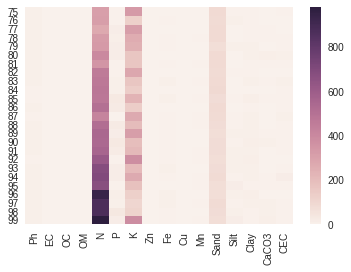

In [162]:
sns.heatmap(X_test)

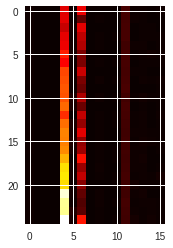

In [163]:
plt.imshow(X_test, cmap='hot', interpolation='nearest')

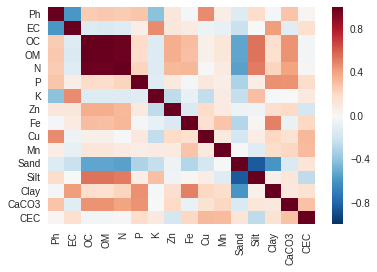

In [164]:
sns.heatmap(X_test.corr())

In [716]:
def convert_output(s):
    if s==0:
        return "Non-Fertile"
    else:
        return "Fertile"

res = X_test.reset_index(drop='true')
label = pd.DataFrame(testlabel.flatten())
res = pd.concat([res,label],axis=1)
res.columns = ['Ph','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC','Output']
res.Output = res.Output.map(convert_output)

In [717]:
for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        print row['Ph']

8.25
8.29
8.4
8.12
7.5
9.19


In [718]:
def Fertilize(row):
    d = {}
    if row['CaCO3']<5:
        d['CaCO3'] = 5 - row['CaCO3']
        res['CaCO3'] = 5
        
    elif row['Cu'] < 0.2:
        d['Cu'] = 0.2 - row['Cu']
        res['Cu'] = 0.2
    elif row['Fe'] < 4.5:
        d['Fe'] = 4.5 - row['Fe']
        res['Fe'] = 4.5
    elif row['Zn']<0.6:
        d['Zn'] = 0.6 - row['Zn']
        res['Zn'] = 0.6
    elif row['Mn']<1:
        d['Mn'] = 1 - row['Mn']
        res['Mn'] = 1
        
    elif row['Ph']<6.5:
        d['Ph'] = 6.5 - row['Ph']
        row['Ph'] = 6.5
    elif row['Ph']>8:
        d['Ph'] = 8 - row['Ph']
        row['Ph'] = 8
        
    elif row['EC']>2.5:
        d['EC'] = 2.5 - row['EC']
        row['EC'] = 2.5
    elif row['EC']>1.6:
        d['EC'] = 1.6 - row['EC']
        row['EC'] = 1.6
    elif row['EC']>0.8:
        d['EC'] = 0.8 - row['EC']
        row['EC'] = 0.8
        
#     elif row['OC']<6.5:
#         d['OC'] = 6.5 - row['OC']
#         row['OC'] = 6.5
#     elif row['N']>8:
#         d['N'] = 8 - row['N']
#         row['N'] = 8
#     elif row['P']<6.5:
#         d['P'] = 6.5 - row['P']
#         row['P'] = 6.5
#     elif row['K']>8:
#         d['K'] = 8 - row['K']
#         row['K'] = 8
    return d,row
        
        

In [727]:
for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        new_p = 0
        for inner_loop in range(20):
            d,row = Fertilize(row)
            
            for key,val in d.items():
                out[key]=val
            
            n_test = row
            new = pd.DataFrame(n_test[0:16].values.reshape(1,-1))
            new.columns = ['Ph','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC']
            new_p = rf.predict(new)
        print out,new_p



# for index, row in res.iterrows():
#     if row['Output']=="Non-Fertile":
#         out = {}
#         out,res = Fertilize(index,row,res)
#         print out

{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -0.25, 'Cu': 0.08000000000000002} [0]
{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -0.28999999999999915, 'Cu': 0.08000000000000002} [0]
{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -0.40000000000000036, 'Cu': 0.08000000000000002} [0]
{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -0.11999999999999922, 'Cu': 0.08000000000000002} [0]
{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -0.11999999999999922, 'Cu': 0.08000000000000002} [0]
{'Zn': 0.37, 'Mn': 0.19999999999999996, 'CaCO3': 1.88, 'Fe': 2.4, 'Ph': -1.1899999999999995, 'Cu': 0.08000000000000002} [0]


In [483]:
print res
print new

      Ph    EC    OC    OM    N     P    K    Zn   Fe    Cu   Mn  Sand  Silt  \
0   8.25  0.34  0.42  0.72  315   6.7  334  0.41  4.5  0.19  3.6  88.6   7.1   
1   8.29  0.12  0.44  0.75  318   5.2  130  0.23  4.5  0.40  2.2  85.2   9.5   
2   8.40  0.35  0.44  0.75  278  18.3  320  0.74  4.5  0.37  3.7  90.2   3.4   
3   8.26  0.25  0.46  0.79  323  11.5  264  0.36  4.5  0.07  7.1  90.7   2.5   
4   8.11  0.34  0.48  0.82  335  17.2  248  0.38  4.5  0.33  1.7  79.8   9.9   
5   8.64  0.10  0.61  1.05  400  20.6  166  0.68  4.5  0.39  3.4  89.0   1.5   
6   8.80  0.15  0.71  1.22  354   4.0  165  0.56  4.5  0.71  4.2  90.5   2.9   
7   8.12  0.14  0.76  1.31  460   4.6  283  0.38  4.5  0.18  0.8  86.0   6.7   
8   9.21  0.14  0.76  1.31  472   9.8  165  0.18  4.5  0.57  5.8  88.2   2.4   
9   7.50  0.22  0.76  1.27  486   9.5  139  0.72  4.5  0.12  1.8  95.4   1.4   
10  7.31  0.46  0.76  1.22  475  32.4  241  0.27  4.5  0.23  4.2  80.5   6.8   
11  9.19  0.19  0.83  1.43  510  27.9  1

In [672]:
a = {1:1,2:2}
b = {1:8,2:9,3:9}
a = b
print a,b

{1: 8, 2: 9, 3: 9} {1: 8, 2: 9, 3: 9}
